# <font color=blue size=10> 8th FLAI Machine Learning</font>

# <font color=BLUE size=12> Competition

***
**Author**: [Camila Maestrelli](https://www.linkedin.com/in/camila-maestrelli-leobons/)
***

This is a notebook related to the FLAI MAchine Learning Competition

### 1. Problem definition
### 2. Importing the data
### 3. Understanding the data
### 4. Cleaning the data
### 5. EDA 
***
## 6. Preprocessing
## 7. Algorithm and model criation

## 8. Result Interpretation and model evaluation

## <font color=red>This notebook covers from the Preprocessing step

In [1]:
# importing the libraries

import numpy as np # linear algebra library
import pandas as pd
pd.set_option('display.max_colwidth', None)

# visualization libraries
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.size": 12,
    "font.weight": "bold", # bold fonts
    "xtick.major.size": 5,
    "xtick.major.pad": 7,
    "xtick.labelsize": 15,  # large tick labels
    "grid.color": "0.5",    # gray gridlines
    "grid.linestyle": "-",  # solid gridlines
    "grid.linewidth": 0.5,  # thin gridlines
    "lines.linewidth": 2, # thick lines
    "lines.color": "g",   # green lines
    "savefig.dpi": 300,     # higher resolution output.
})    
import seaborn as sns
#import sweetviz as sv


# Machine Learning library - Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

#from pycaret.classification import *

# Clustering
from sklearn.cluster import KMeans

# tree plot
from sklearn.tree import plot_tree
#!pip install graphviz==0.19.1
#!apt-get install graphviz
from sklearn.tree import export_graphviz
import graphviz

# validation
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, RepeatedKFold, KFold, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

!pip install optuna
import optuna


# transformations
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler # used when there are many outliers
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer # the “n_quantiles” argument must be set to a value less than the number of observations in the training dataset
from sklearn.preprocessing import PowerTransformer

# Encoding
#!pip install category_encoders
#import category_encoders as ce  
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder # transform a categorical variable into a numerical integer sorted by alphabetical order
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder # tranform a categorical target variable into a numerical integer sorted by alphabetical order
from sklearn.preprocessing import KBinsDiscretizer

# classification taking the probability classification into account
from sklearn.preprocessing import Binarizer

# Make your own function to tranform or encode your data
from sklearn.preprocessing import FunctionTransformer
 
# Imputers
from sklearn.impute import SimpleImputer, KNNImputer 

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
# roc curves
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve


# anova testing
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

In [2]:
train_url = 'https://raw.githubusercontent.com/camilamaestrelli/Employee-Churn-Classification-Competition/main/treino.csv'
test_url = 'https://raw.githubusercontent.com/camilamaestrelli/Employee-Churn-Classification-Competition/main/teste.csv'

# importing the datasets
original_train = pd.read_csv(train_url, sep = ';', decimal = ',')
original_test = pd.read_csv(test_url, sep = ';', decimal = ',')

# copying the datsets
df_train = original_train.copy()
df_test = original_test.copy()

### Transforming the categorical data into numerical integer values according to the turnover rate

In [3]:
dict_turnover = {'SIM': 1, 
                 'NAO': 0}

df_train['turnover_apos_1_ano'] = df_train['turnover_apos_1_ano'].map(dict_turnover)

In [4]:
dict_sexo = {'FEMININO': 1, 
                 'MASCULINO': 0}

df_train['func_sexo'] = df_train['func_sexo'].map(dict_sexo)
df_test['func_sexo'] = df_test['func_sexo'].map(dict_sexo)

In [5]:
dict_racacor = {'SEM INFO': 0, 
                'PRETA-PARDA': 1, 
                'AMARELA-BRANCA':2, 
                'INDIGENA':3}

df_train['func_racacor'] = df_train['func_racacor'].map(dict_racacor)
df_test['func_racacor'] = df_test['func_racacor'].map(dict_racacor)

In [6]:
dict_escolar = {'ANALFABETO-FUND_INCOMPLETO': 1, 
                'FUND_COMPLETO-MEDIO_INCOMPLETO': 2, 
                'MEDIO COMPLETO':3, 
                'SUPERIOR_INCOMPLETO':4,
                'SUPERIOR_COMPLETO':5}

df_train['func_escolaridade'] = df_train['func_escolaridade'].map(dict_escolar)
df_test['func_escolaridade'] = df_test['func_escolaridade'].map(dict_escolar)

In [7]:
df_train.contrato_salario = df_train.contrato_salario/1000
df_test.contrato_salario = df_test.contrato_salario/1000

In [8]:
dict_uf = {'MA': 1,
           'AL': 2,
           'PI': 3,
           'CE': 4,
           'BA': 5,
           'RN': 6,
           'SE': 7,
           'PB': 8,
           'PE': 9
          }
           
df_train['func_uf'] = df_train['func_uf'].map(dict_uf)
df_test['func_uf'] = df_test['func_uf'].map(dict_uf)

In [9]:
dict_deficiencia = {'SIM': 1, 
                    'NAO': 0}

df_train['func_deficiencia'] = df_train['func_deficiencia'].map(dict_deficiencia)
df_test['func_deficiencia'] = df_test['func_deficiencia'].map(dict_deficiencia)

In [10]:
dict_porte = {'ATE 4': 1,
              'DE 5 A 9': 2,
              'DE 10 A 19': 3,
              'DE 20 A 49': 4,                   
              'DE 50 A 99': 5,
              'DE 100 A 249': 6,
              'DE 250 A 499': 7,
              'DE 500 A 999': 8,
              '1000 OU MAIS': 9
             }

df_train['empresa_porte'] = df_train['empresa_porte'].map(dict_porte)
df_test['empresa_porte'] = df_test['empresa_porte'].map(dict_porte)

In [11]:
dict_setor = {'Agricultura': 1,
              'Construçao civil': 2,
              'Comércio': 3,
              'Indústria': 4,
              'Serviços': 5,
              'Administraçao pública': 6
             }

df_train['empresa_setor'] = df_train['empresa_setor'].map(dict_setor)
df_test['empresa_setor'] = df_test['empresa_setor'].map(dict_setor)


## 6. Preprocessing

### Functions to tranform the data

#### The functions below are possibilities based on the EDA


In [12]:
# defining functions for dataset transformations

def aux_no_change(df):
    return df

# feature func_idade / Age
top_age = df_train['func_idade'].quantile(0.975)
media_age = df_train['func_idade'].mean()

def aux_age1(df):
    df.loc[df['func_idade']>top_age, 'func_idade'] = top_age
    return df

def aux_age2(df):
    df.loc[df['func_idade'] <= 25, 'func_idade'] = 1
    df.loc[(df['func_idade']  > 25) & (df['func_idade']  <= 45) ,'func_idade'] = 2
    df.loc[(df['func_idade']  > 45) & (df['func_idade']  <= 55) ,'func_idade'] = 3
    df.loc[df['func_idade'] > 55,'func_idade'] = 4
    return df

def aux_age3(df):
    df.loc[df['func_idade'] <= 20, 'func_idade'] = 1
    df.loc[(df['func_idade']  > 20) & (df['func_idade']  <= 25) ,'func_idade'] = 2
    df.loc[(df['func_idade']  > 25) & (df['func_idade']  <= 30) ,'func_idade'] = 3
    df.loc[(df['func_idade']  > 30) & (df['func_idade']  <= 35) ,'func_idade'] = 4
    df.loc[(df['func_idade']  > 35) & (df['func_idade']  <= 40) ,'func_idade'] = 5
    df.loc[(df['func_idade']  > 40) & (df['func_idade']  <= 45) ,'func_idade'] = 6
    df.loc[(df['func_idade']  > 45) & (df['func_idade']  <= 50) ,'func_idade'] = 7
    df.loc[(df['func_idade']  > 50) & (df['func_idade']  <= 55) ,'func_idade'] = 8


    df.loc[df['func_idade'] > 55,'func_idade'] = 9
    return df

def aux_age4(df):
    df.loc[df['func_idade'] <= 18, 'func_idade'] = 1
    df.loc[(df['func_idade']  > 18) & (df['func_idade']  <= 24) ,'func_idade'] = 2
    df.loc[(df['func_idade']  > 24) & (df['func_idade']  <= 29) ,'func_idade'] = 3
    df.loc[(df['func_idade']  > 29) & (df['func_idade']  <= 39) ,'func_idade'] = 4
    df.loc[(df['func_idade']  > 39) & (df['func_idade']  <= 49) ,'func_idade'] = 5
    df.loc[(df['func_idade']  > 49) & (df['func_idade']  <= 64) ,'func_idade'] = 6


    df.loc[df['func_idade'] > 65,'func_idade'] = 7
    return df

# feature func_racacor / Race

def aux_race1(df):
    df.loc[df['func_racacor']==1, 'func_racacor' ]=1
    df.loc[df['func_racacor']==3, 'func_racacor'] =1
    return df

def aux_race2(df):
    df.loc[df['func_racacor']==3, 'func_racacor'] =2
    return df

# feature func_escolaridade / education Level

def aux_escolar1(df):
    df.loc[df['func_escolaridade']==2, 'func_escolaridade'] = 1
    df.loc[(df['func_escolaridade']==3) | (df['func_escolaridade']==4) ,'func_escolaridade'] = 2
    df.loc[df['func_escolaridade']==5,'func_escolaridade'] = 3
    return df

def aux_escolar2(df):
    df.loc[df['func_escolaridade']==2,'func_escolaridade'] = 1
    df.loc[df['func_escolaridade']==3,'func_escolaridade'] = 2
    df.loc[df['func_escolaridade']==4,'func_escolaridade'] = 3
    df.loc[df['func_escolaridade']==5,'func_escolaridade'] = 4
    return df

    
def aux_escolar3(df):
    df.loc[df['func_escolaridade']==4,'func_escolaridade'] = 3
    df.loc[df['func_escolaridade']==5,'func_escolaridade'] = 4
    return df
    
    
# feature func_uf / state

def aux_uf1(df):
    df.loc[df['func_uf']==3,'func_uf'] = 2
    df.loc[(df['func_uf']==4) | (df['func_uf']==5) | (df['func_uf']==6),'func_uf' ] = 3
    df.loc[(df['func_uf']==7) | (df['func_uf']==8),'func_uf' ] = 4
    df.loc[df['func_uf']==9,'func_uf'] = 5
    return df

def aux_uf2(df):
    df.loc[df['func_uf']==2,'func_uf'] = 1
    df.loc[df['func_uf']==3,'func_uf'] = 2
    df.loc[df['func_uf']==4,'func_uf'] = 3
    df.loc[df['func_uf']==5,'func_uf'] = 4
    return df

# feature: empresa_porte
def aux_empresa1(df):
    df.loc[df['empresa_porte'] < 3, 'empresa_porte' ] = 1
    df.loc[(df['empresa_porte']  >= 3) & (df['empresa_porte']  < 5) ] = 2
    df.loc[(df['empresa_porte']  >= 5) & (df['empresa_porte']  < 7) ] = 3
    df.loc[(df['empresa_porte']  >= 7) & (df['empresa_porte']  < 9) ] = 4
    df.loc[df['empresa_porte'] == 9] = 5    
    return df
            
def aux_empresa2(df): 
    df.loc[df['empresa_porte'] < 4, 'empresa_porte'] = 1
    df.loc[(df['empresa_porte']  >= 4) & (df['empresa_porte']  < 6) ,'empresa_porte'] = 2
    df.loc[(df['empresa_porte']  >= 6) & (df['empresa_porte']  < 8) ,'empresa_porte'] = 3
    df.loc[df['empresa_porte'] >= 8,'empresa_porte'] = 4
    return df

# feature empresa_setor

def aux_field(df):
    df.loc[df['empresa_setor'] == 6 ,'empresa_setor'] = 5
    return df  

# feature horas trabalho
bottom_workhours = df_train['contrato_horastrabalho'].quantile(0.05)

def aux_workhours(df):
    df.loc[df['contrato_horastrabalho']<bottom_workhours,'contrato_horastrabalho'] = bottom_workhours
    return df

# feature contrato_salario / wage
#robust, log, powertransformer, quantiletransformer

def aux_wage1(df):
    df.loc[df['contrato_salario'] <= 1.25, 'contrato_salario'] = 1
    df.loc[(df['contrato_salario']  > 1.25) & (df['contrato_salario']  <= 1.4) ,'contrato_salario'] = 2
    df.loc[(df['contrato_salario']  > 1.4) & (df['contrato_salario']  <= 1.5) ,'contrato_salario'] = 3
    df.loc[df['contrato_salario'] > 1.5,'contrato_salario'] = 4
    return df

def aux_wage2(df):
    df.loc[df['contrato_salario'] > 20,'contrato_salario'] = 20
    return df

def aux_wage3(df):
    df.loc[df['contrato_salario'] >= 15 ,'contrato_salario'] = 15
    return df

def wage_hour(df, df2 = df_train):
    imputer = KNNImputer(missing_values = 0, weights = 'distance', n_neighbors=10)
    df2.contrato_horastrabalho = imputer.fit_transform(df2.contrato_horastrabalho)
    df['wage_per_hour'] = df2.contrato_salario / df2.contrato_horastrabalho
    return df
    

In [13]:
#!pip install category_encoders
import category_encoders as ce  
# Numerical transformations
max_abs = MaxAbsScaler()
sc = StandardScaler()
min_max = MinMaxScaler()
robust = RobustScaler() # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
norma = Normalizer()
quanti_uni1 = QuantileTransformer(output_distribution='uniform', n_quantiles=5)
quanti_uni2 = QuantileTransformer(output_distribution='uniform', n_quantiles=3)
quanti_norm = QuantileTransformer(output_distribution='normal', n_quantiles=600)
p_trans = PowerTransformer(method = 'box-cox')
p_trans_johnson = PowerTransformer()
log1 = FunctionTransformer(np.log1p)
log = FunctionTransformer(np.log)

# Categorical encoders
bi_encoder = ce.BinaryEncoder()
target_encoder = ce.TargetEncoder()
out_encoder = ce.LeaveOneOutEncoder()

# My transformation functions
no_change = FunctionTransformer(aux_no_change)

age1 = FunctionTransformer(aux_age1)
age2 = FunctionTransformer(aux_age2)
age3 = FunctionTransformer(aux_age3)
age4 = FunctionTransformer(aux_age4)

race1 = FunctionTransformer(aux_race1)
race2 = FunctionTransformer(aux_race2)

escolar1 = FunctionTransformer(aux_escolar1)
escolar2 = FunctionTransformer(aux_escolar2)
escolar3 = FunctionTransformer(aux_escolar3)

uf1 = FunctionTransformer(aux_uf1)
uf2 = FunctionTransformer(aux_uf2)

size1 = FunctionTransformer(aux_empresa1)
size2 = FunctionTransformer(aux_empresa2)

field = FunctionTransformer(aux_field)

hours = FunctionTransformer(aux_workhours)

wage1 = FunctionTransformer(aux_wage1)
wage2 = FunctionTransformer(aux_wage2)
wage3 = FunctionTransformer(aux_wage3)

wage_hour = FunctionTransformer(wage_hour)

# imputer
horas_imputer = KNNImputer(missing_values = 0, weights = 'distance', n_neighbors=10)

# Transformations for the numerical data
num_trans = [robust, quanti_norm, log1]
discrete_trans = [max_abs, sc, min_max, robust, quanti_uni1, log1, no_change]

# Tranformations for the categorical data (including the possibility of being treated as numerical)
cat_num_trans1 =  [max_abs, sc, min_max, robust, norma, log1, no_change, out_encoder, target_encoder, quanti_uni1]
cat_num_trans2 =  [max_abs, sc, min_max, robust, norma, log1, no_change, out_encoder, target_encoder, quanti_uni2]

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\packaging-20.9.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



#### OBS: 

* As the Grid and Randomized Search were showing error on my computer, I had to choose the pipeline transformation for each feature. These choices were made taking into account the EDA, which is in the other notebook (as well as some manual testing)

In [74]:
# defining the pipeline for each feature
age_pipeline = Pipeline(
    steps = [
        ("trans_age", age3),
        #("scaler", log1),
        ])

race_pipeline = Pipeline(
    steps = [
        ("trans_race", race2),
        ("scaler", out_encoder),
        ])

escolar_pipeline = Pipeline(
    steps = [
        ("trans_escolar", no_change),
       # ("scaler", robust),
        ])

uf_pipeline = Pipeline(
    steps = [
        ("trans_uf", uf1),
        #("scaler", min_max),
        ])

size_pipeline =  Pipeline(
    steps = [
        ("trans_size", size1),
        #("scaler", out_encoder),
        ])

field_pipeline = Pipeline(
    steps = [
        ("trans_field", field),
       # ("scaler", target_encoder),
        ])

#workhours_pipeline = Pipeline(
 #   steps = [
        #('zero', horas_imputer),
        #("trans_hours", no_change),
        #('new_column', wage_hour),
        #("scaler", quanti_uni1),
  #      ])

wage_pipeline = Pipeline(
    steps = [
        ("trans_wage", wage2),
        ("scaler", max_abs),
        ])



# Setting up the pipeline transformation for each column/ variable
preprocessor = ColumnTransformer([('age', age3, ['func_idade']), 
                                 ('race', out_encoder, ['func_racacor']), 
                                 #('escolar', escolar_pipeline , ['func_escolaridade']),
                                 ('state', out_encoder,['func_uf']),
                                 ('size', size1, ['empresa_porte']),
                                 ('field', out_encoder, ['empresa_setor']),
                                 ('workhours', sc, ['contrato_horastrabalho']),
                                 ('wage', wage_pipeline, ['contrato_salario']),

                          
                                 ],
                                remainder='passthrough')

## 7. Algorithm and model criation

* At this step, the  hyperparameters tuning was made with OPTUNA

### Hyperparameter optimization with Optuna 

In [ ]:
SEED = 1
np.random.seed(SEED)


def objective(trial):
    X = df_train.drop(columns = ['turnover_apos_1_ano'], axis = 1)
    y = df_train['turnover_apos_1_ano']
    
    #params
    reg_alpha = trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True) #reg_alpha 
    reg_lambda = trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True) #reg_lambda
    num_leaves = trial.suggest_int("num_leaves", 2, 256, 2)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.4, 1.0)
    subsample = trial.suggest_float("subsample", 0.4, 1.0)
    subsample_freq = trial.suggest_int("subsample_freq", 1, 7)
    min_child_samples = trial.suggest_int("min_child_samples", 5, 100, 5)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2)
    
    n_estimators = trial.suggest_int("n_estimators", 80, 500, 20)

    lgbm_model = LGBMClassifier(reg_alpha =reg_alpha,
                           reg_lambda=reg_lambda, 
                           num_leaves=num_leaves,
                           colsample_bytree=colsample_bytree,
                           
                           subsample_freq=subsample_freq,
                           min_child_samples=min_child_samples,                          
                           max_depth=max_depth,
                           learning_rate=learning_rate,
                           n_estimators=n_estimators,
                           subsample=subsample,
                           random_state=1,
                           
                           
                           scale_pos_weight = 1.8
                           )
        
    scoring = ['f1', 'recall', 'precision', 'roc_auc', 'accuracy', 'balanced_accuracy']    
    validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2,random_state=1)

    pipe = Pipeline(steps=[("preprocessor", preprocessor),('lgbm', lgbm_model)])
    indicators = cross_validate(pipe, X, y, cv = validacao, scoring = scoring, return_train_score=True)
    
    f1_test = indicators['test_f1'].mean()
       
    return f1_test

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2022-03-24 18:54:08,939] A new study created in memory with name: no-name-24170aaf-f394-4548-a7ac-f8a169ec56d4
[I 2022-03-24 18:54:16,809] Trial 0 finished with value: 0.797500838536885 and parameters: {'reg_alpha': 3.616655550422671e-06, 'reg_lambda': 0.007785852212863371, 'num_leaves': 102, 'colsample_bytree': 0.6155937481180143, 'subsample': 0.8783230954791968, 'subsample_freq': 7, 'min_child_samples': 45, 'max_depth': 3, 'learning_rate': 0.09646222495846729, 'n_estimators': 320}. Best is trial 0 with value: 0.797500838536885.
[I 2022-03-24 18:54:28,908] Trial 1 finished with value: 0.79592284639435 and parameters: {'reg_alpha': 1.2415136491137117e-05, 'reg_lambda': 0.02807147874001412, 'num_leaves': 36, 'colsample_bytree': 0.6362270259099134, 'subsample': 0.5589904641340183, 'subsample_freq': 6, 'min_child_samples': 90, 'max_depth': 15, 'learning_rate': 0.09636739397276739, 'n_estimators': 180}. Best is trial 0 with value: 0.797500838536885.
[I 2022-03-24 18:54:59,198] Trial 2 f

In [16]:
trial_lgbm = study.best_trial
print('Test F1: {}'.format(trial_lgbm.value))
print("Best hyperparameters: {}".format(trial_lgbm.params))

Test F1: 0.7981575619981504
Best hyperparameters: {'reg_alpha': 0.001287000313009339, 'reg_lambda': 1.392466328698503e-06, 'num_leaves': 94, 'colsample_bytree': 0.6463087211577431, 'subsample': 0.8620225732642957, 'subsample_freq': 6, 'min_child_samples': 50, 'max_depth': 5, 'learning_rate': 0.08220994963046517, 'n_estimators': 340}


In [128]:
SEED = 1
np.random.seed(SEED)

X = df_train.drop(columns = ['turnover_apos_1_ano',], axis = 1)
y = df_train['turnover_apos_1_ano']

validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)

# Best_params
params1 = {'reg_alpha': 0.001287000313009339, 
           'reg_lambda': 1.392466328698503e-06, 
           'num_leaves': 94, 
           'colsample_bytree': 0.6463087211577431, 
           'subsample': 0.8620225732642957, 
           'subsample_freq': 6, 
           'min_child_samples': 50, 
           'max_depth': 5, 
           'learning_rate': 0.068220994963046517, 
           'n_estimators': 330,
   
           }

lgbm1 = LGBMClassifier(**params1,
                          
                       scale_pos_weight = 1.8   ,
                       )
                                       

pipe = Pipeline(steps=[("preprocessor", preprocessor),('lgbm', lgbm1)])

scoring = ['f1', 'recall', 'precision', 'roc_auc', 'accuracy', 'balanced_accuracy']

indicators = cross_validate(pipe, X, y, cv = validacao, scoring = scoring, return_train_score=True)



result = pd.DataFrame(indicators)
result.agg(['mean', 'std'])





,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
mean,0.707809,0.258400,0.798992,0.824562,0.923812,0.954221,0.704028,0.725932,0.916987,0.945806,0.832600,0.853792,0.852546,0.875752
std,0.030447,0.008973,0.007280,0.002152,0.011703,0.002480,0.011126,0.003149,0.005594,0.001053,0.007163,0.002083,0.006302,0.001804


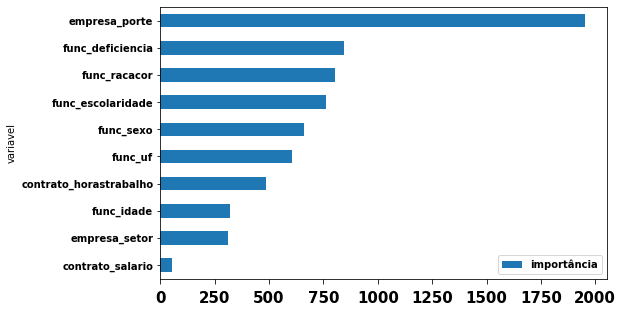

In [62]:
# Feature Importances

SEED = 1
np.random.seed(SEED)


lgbm_importance = Pipeline(steps=[("preprocessor", preprocessor),('voting', lgbm1)])


X_final = df_train.drop(columns = ['turnover_apos_1_ano'], axis = 1)
y_final = df_train['turnover_apos_1_ano']

lgbm_importance.fit(X_final, y_final)

variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importância'] = lgbm_importance.steps[1][1].feature_importances_
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8, 5));

In [93]:
SEED = 1
np.random.seed(SEED)



X = df_train.drop(columns = ['turnover_apos_1_ano',], axis = 1)
y = df_train['turnover_apos_1_ano']

validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)

# XGBoost from Optuna / 2
xgb_optuna_params2 = {'reg_alpha': 0.457409020437707, 
                      'reg_lambda': 1.0501585949864789e-05, 
                      'colsample_bytree': 0.7187467800899682, 
                      'subsample': 0.7199522137702035, 
                      'min_child_weight': 2, 
                      'max_depth': 6, 
                      'learning_rate': 0.0665313919791968109, 
                      'gamma': 3, 
                      'n_estimators': 300,

                      }


xgb_optuna2 = XGBClassifier(**xgb_random_params2,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)


pipe = Pipeline(steps=[("preprocessor", preprocessor),('lgbm', xgb_optuna2)])

scoring = ['f1', 'recall', 'precision', 'roc_auc', 'accuracy', 'balanced_accuracy']

indicators = cross_validate(pipe, X, y, cv = validacao, scoring = scoring, return_train_score=True)



result = pd.DataFrame(indicators)
result.agg(['mean', 'std'])


,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
mean,3.410740,0.201585,0.799621,0.841004,0.920479,0.965192,0.706967,0.745138,0.916787,0.958704,0.833867,0.868592,0.852807,0.889715
std,0.852597,0.028668,0.006475,0.001880,0.012298,0.001906,0.010393,0.002892,0.005229,0.001049,0.006368,0.001803,0.005652,0.001512


In [114]:
SEED = 1
np.random.seed(SEED)



X = df_train.drop(columns = ['turnover_apos_1_ano',], axis = 1)
y = df_train['turnover_apos_1_ano']

validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)

# XGBoost from randomizedsearch
xgb_random_params = {'subsample': 0.6, 
                     'num_parallel_tree': 2, 
                     'n_estimators': 300, 
                     'min_child_weight': 5, 
                     'max_depth': 4, 
                     'learning_rate': 0.15, 
                     'gamma': 0.1, 
                     'colsample_bytree': 0.4, 
                     'base_score': 0.25,
                      
                     }


xgb_randomized = XGBClassifier(**xgb_random_params,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)


pipe = Pipeline(steps=[("preprocessor", preprocessor),('lgbm', xgb_randomized)])

scoring = ['f1', 'recall', 'precision', 'roc_auc', 'accuracy', 'balanced_accuracy']

indicators = cross_validate(pipe, X, y, cv = validacao, scoring = scoring, return_train_score=True)



result = pd.DataFrame(indicators)
result.agg(['mean', 'std'])


# 0.798930

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
mean,3.413431,0.285415,0.798930,0.825878,0.922886,0.952925,0.704468,0.728727,0.914878,0.94592,0.832700,0.855317,0.852422,0.876661
std,0.746188,0.044093,0.007549,0.001822,0.011368,0.001887,0.011404,0.002714,0.005530,0.00091,0.007398,0.001767,0.006491,0.001501


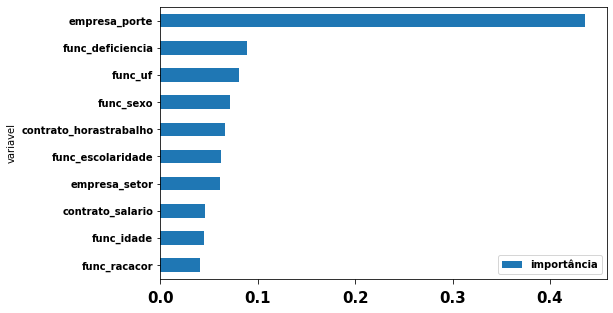

In [61]:
# Feature Importances

SEED = 1
np.random.seed(SEED)


xgb_randomized_importance = Pipeline(steps=[("preprocessor", preprocessor),('voting', xgb_randomized)])


X_final = df_train.drop(columns = ['turnover_apos_1_ano'], axis = 1)
y_final = df_train['turnover_apos_1_ano']

xgb_randomized_importance.fit(X_final, y_final)

variaveis = pd.DataFrame()
variaveis['variavel'] = X.columns
variaveis['importância'] = xgb_randomized_importance.steps[1][1].feature_importances_
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8, 5));

In [105]:
SEED = 1
np.random.seed(SEED)



X = df_train.drop(columns = ['turnover_apos_1_ano',], axis = 1)
y = df_train['turnover_apos_1_ano']

validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)

# XGBoost from optuna
xgb_optuna_params = {'reg_alpha': 0.005843897313375328, 
                     'reg_lambda': 1.2631094965985736, 
                     'colsample_bytree': 0.941441084234863, 
                     'subsample': 0.7334692265641606, 
                     'min_child_weight': 5, 
                     'max_depth': 11, 
                     'learning_rate': 0.04990536892121087, 
                     'gamma': 0.1, 
                     'n_estimators': 80,
                     'base_score': 0.3
                     }


xgb_optuna = XGBClassifier(**xgb_optuna_params,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)


pipe = Pipeline(steps=[("preprocessor", preprocessor),('lgbm', xgb_optuna)])

scoring = ['f1', 'recall', 'precision', 'roc_auc', 'accuracy', 'balanced_accuracy']

indicators = cross_validate(pipe, X, y, cv = validacao, scoring = scoring, return_train_score=True)



result = pd.DataFrame(indicators)
result.agg(['mean', 'std'])



,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
mean,2.139828,0.131382,0.799265,0.837019,0.924183,0.962090,0.704219,0.740732,0.916300,0.958918,0.832833,0.865092,0.852809,0.886302
std,0.476891,0.021174,0.006229,0.001519,0.011626,0.001553,0.009491,0.002709,0.005149,0.000611,0.006027,0.001561,0.005515,0.001160


## Voting Classifier

In [145]:
SEED = 1
np.random.seed(SEED)

X = df_train.drop(columns = ['turnover_apos_1_ano',], axis = 1)
y = df_train['turnover_apos_1_ano']

validacao = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)

# Randomized XGB - F1 = 0.798930
xgb_random_params = {'subsample': 0.6, 
                     'num_parallel_tree': 2, 
                     'n_estimators': 300, 
                     'min_child_weight': 5, 
                     'max_depth': 4, 
                     'learning_rate': 0.15, 
                     'gamma': 0.1, 
                     'colsample_bytree': 0.4, 
                     'base_score': 0.25}
xgb_randomized = XGBClassifier(**xgb_random_params,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)

# LGBM Optuna - F1 = 0.798992
params1 = {'reg_alpha': 0.001287000313009339, 'reg_lambda': 1.392466328698503e-06, 
           'num_leaves': 94, 'colsample_bytree': 0.6463087211577431, 
           'subsample': 0.8620225732642957, 'subsample_freq': 6, 
           'min_child_samples': 50, 'max_depth': 5, 
           'learning_rate': 0.068220994963046517, 'n_estimators': 330}
lgbm1 = LGBMClassifier(**params1,
                          
                       scale_pos_weight = 1.8   ,
                                       
) 


# XGBoost from optuna - F1 = 0.799265
xgb_optuna_params = {'reg_alpha': 0.005843897313375328, 
                     'reg_lambda': 1.2631094965985736, 
                     'colsample_bytree': 0.941441084234863, 
                     'subsample': 0.7334692265641606, 
                     'min_child_weight': 5, 
                     'max_depth': 11, 
                     'learning_rate': 0.04990536892121087, 
                     'gamma': 0.1, 
                     'n_estimators': 80,
                     'base_score': 0.3
                     }
xgb_optuna = XGBClassifier(**xgb_optuna_params,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)


# XGBoost from Optuna / 2 - F1 = 0.799621
xgb_optuna_params2 = {'reg_alpha': 0.457409020437707, 
                      'reg_lambda': 1.0501585949864789e-05, 
                      'colsample_bytree': 0.7187467800899682, 
                      'subsample': 0.7199522137702035, 
                      'min_child_weight': 2, 
                      'max_depth': 6, 
                      'learning_rate': 0.0665313919791968109, 
                      'gamma': 3, 
                      'n_estimators': 300,
                      }
xgb_optuna2 = XGBClassifier(**xgb_optuna_params2,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)


estimators=[       
    ('xgb_random', xgb_randomized), ('lgbm', lgbm1), ('xgb_optuna', xgb_optuna), ('xgb_optuna2', xgb_optuna2)
]

soft = VotingClassifier(estimators, voting='soft', weights = [1,1,8,9]) 
pipe_soft = Pipeline(steps=[("preprocessor", preprocessor),('voting', soft)])

scoring = ['f1', 'recall', 'precision', 'roc_auc', 'accuracy', 'balanced_accuracy']

indicators = cross_validate(pipe_soft, X, y, cv = validacao, scoring = scoring, return_train_score=True)



result = pd.DataFrame(indicators)
result.agg(['mean', 'std'])



,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
mean,9.146443,0.674328,0.800293,0.837749,0.925386,0.964636,0.705127,0.740368,0.917831,0.959090,0.833667,0.865458,0.853723,0.887145
std,1.437259,0.094683,0.005760,0.001475,0.009620,0.001522,0.010492,0.002503,0.005392,0.000701,0.006196,0.001484,0.004763,0.001151


## 8. Result Interpretation and model evaluation

### Best threshold

In [146]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

SEED = 1
np.random.seed(SEED)

X = df_train.drop(columns = ['turnover_apos_1_ano'], axis = 1)
y = df_train['turnover_apos_1_ano']

validacao1 = StratifiedKFold(n_splits = 10)

predict_prob = cross_val_predict(pipe_soft, X, y, cv = validacao1, method = 'predict_proba')

predict_prob = predict_prob[: ,1]

predict_prob = predict_prob.reshape(1, -1)
predict_prob = pd.DataFrame(predict_prob)
predict_prob = predict_prob.T


Best Threshold=0.494258, F-Score=0.802


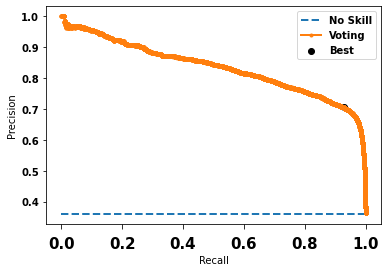

In [149]:
# keep probabilities for the positive outcome only
y_prob = predict_prob[0]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y, y_prob)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y[y==1]) / len(y)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Voting')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [150]:
def aux_proba(x):
  if x < 0.494258:
    return 0
  else: 
    return 1


y_proba = predict_prob[0].map(aux_proba)

print(f1_score(y, y_proba))
print(accuracy_score(y, y_proba))
print(recall_score(y, y_proba))



0.801756487025948
0.8344666666666667
0.929642658766895


### OBS:

* This model got a F1 score of 0.80116 on the test dataset

# <font color=blue>8th Submission

In [155]:
SEED = 1
np.random.seed(SEED)

X = df_train.drop(columns = ['turnover_apos_1_ano',], axis = 1)
y = df_train['turnover_apos_1_ano']



# Randomized XGB - F1 = 0.798930
xgb_random_params = {'subsample': 0.6, 
                     'num_parallel_tree': 2, 
                     'n_estimators': 300, 
                     'min_child_weight': 5, 
                     'max_depth': 4, 
                     'learning_rate': 0.15, 
                     'gamma': 0.1, 
                     'colsample_bytree': 0.4, 
                     'base_score': 0.25}
xgb_randomized = XGBClassifier(**xgb_random_params,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)

# LGBM Optuna - F1 = 0.798992
params1 = {'reg_alpha': 0.001287000313009339, 'reg_lambda': 1.392466328698503e-06, 
           'num_leaves': 94, 'colsample_bytree': 0.6463087211577431, 
           'subsample': 0.8620225732642957, 'subsample_freq': 6, 
           'min_child_samples': 50, 'max_depth': 5, 
           'learning_rate': 0.068220994963046517, 'n_estimators': 330}
lgbm1 = LGBMClassifier(**params1,
                          
                       scale_pos_weight = 1.8   ,
                                       
) 


# XGBoost from optuna - F1 = 0.799265
xgb_optuna_params = {'reg_alpha': 0.005843897313375328, 
                     'reg_lambda': 1.2631094965985736, 
                     'colsample_bytree': 0.941441084234863, 
                     'subsample': 0.7334692265641606, 
                     'min_child_weight': 5, 
                     'max_depth': 11, 
                     'learning_rate': 0.04990536892121087, 
                     'gamma': 0.1, 
                     'n_estimators': 80,
                     'base_score': 0.3
                     }
xgb_optuna = XGBClassifier(**xgb_optuna_params,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)


# XGBoost from Optuna / 2 - F1 = 0.799621
xgb_optuna_params2 = {'reg_alpha': 0.457409020437707, 
                      'reg_lambda': 1.0501585949864789e-05, 
                      'colsample_bytree': 0.7187467800899682, 
                      'subsample': 0.7199522137702035, 
                      'min_child_weight': 2, 
                      'max_depth': 6, 
                      'learning_rate': 0.0665313919791968109, 
                      'gamma': 3, 
                      'n_estimators': 300,
                      }
xgb_optuna2 = XGBClassifier(**xgb_optuna_params2,
                               objective = 'binary:logistic', 
                               eval_metric = 'auc', 
                               scale_pos_weight = 1.8)


estimators=[       
    ('xgb_random', xgb_randomized), ('lgbm', lgbm1), ('xgb_optuna', xgb_optuna), ('xgb_optuna2', xgb_optuna2)
]

soft = VotingClassifier(estimators, voting='soft', weights = [1,1,8,9]) 

modelo_final = Pipeline(steps=[("preprocessor", preprocessor),('voting', soft)])

In [157]:
SEED = 1
np.random.seed(SEED)

df_testando = df_test.copy()

X_final = df_train.drop(columns = ['turnover_apos_1_ano'], axis = 1)
y_final = df_train['turnover_apos_1_ano']

modelo_final.fit(X_final, y_final)


preditos_final_proba = modelo_final.predict_proba(df_test)

preditos_final_proba = preditos_final_proba[: ,1]
preditos_final_proba = preditos_final_proba.reshape(1, -1)
preditos_final_proba = pd.DataFrame(preditos_final_proba)
preditos_final_proba = preditos_final_proba.T

def aux_proba(x):
  if x < 0.494258:
    return 0
  else: 
    return 1


preditos_final = preditos_final_proba[0].map(aux_proba)

df_testando['preditos'] = preditos_final 


In [158]:
df_testando['preditos'].value_counts()

0    7741
1    7259
Name: preditos, dtype: int64

In [159]:
dict_turnover = { 1 : 'SIM', 
                  0 : 'NAO'}

df_testando['preditos'] = df_testando['preditos'].map(dict_turnover)

In [160]:
df_testando['preditos'] 

0        SIM
1        NAO
2        NAO
3        NAO
4        NAO
        ... 
14995    NAO
14996    SIM
14997    SIM
14998    NAO
14999    NAO
Name: preditos, Length: 15000, dtype: object

In [161]:
subm = pd.DataFrame()
subm['turnover_apos_1_ano'] = df_testando.preditos
subm.to_csv('submissão.csv', index = False)